In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import json_normalize
import glob

# Get all JSON files in the directory
file_paths = glob.glob(r'raw_data_rotterdam/*.json')

# Read and concatenate all JSON files
df_list = [pd.read_json(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

# Normalize the nested JSON data
df_normalized = json_normalize(df['data'])

In [7]:
df_normalized

,navigation.draught,navigation.time,navigation.speed,navigation.heading,navigation.location.long,navigation.location.lat,navigation.course,navigation.destination.name,navigation.destination.eta,navigation.status,device.dimensions.to_port,device.dimensions.to_bow,device.dimensions.to_stern,device.dimensions.to_starboard,device.mmsi,vessel.callsign,vessel.subtype,vessel.type,vessel.imo,vessel.name
0,3.0,2021-01-01T00:04:34+00:00,0.0,NaN,4.59392,51.68819,16.8,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
1,3.0,2021-01-01T00:10:34+00:00,0.0,NaN,4.59381,51.68838,8.7,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
2,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
3,3.0,2021-01-01T00:16:34+00:00,0.0,NaN,4.59402,51.68827,11.6,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
4,3.0,2021-01-01T00:22:33+00:00,0.0,NaN,4.59388,51.68833,2.1,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,0,0,0,0,245503000,PBTD,None,dredging-underwater-ops,9516650,JAN LEEGHWATER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,0.0,2021-01-31T23:36:56+00:00,0.0,NaN,4.42844,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80010,0.0,2021-01-31T23:41:57+00:00,0.0,NaN,4.42844,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80011,0.0,2021-01-31T23:46:57+00:00,0.0,NaN,4.42843,51.89567,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE
80012,0.0,2021-01-31T23:51:57+00:00,0.0,NaN,4.42843,51.89566,0.0,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,4,70,5,4,244750043,PE9379,None,cargo,0,TRUDIE


In [8]:
# list of columns to keep
keep = ['navigation.time', 
        'navigation.location.long', 'navigation.location.lat', 
        'navigation.destination.name', 
        'navigation.destination.eta', 'navigation.status', 
        'device.mmsi', 
        'vessel.type', 
        'vessel.imo', 'vessel.name']

# filter the columns
df_keep = df_normalized[keep]

In [9]:
# convert the time to datetime
df_keep = df_keep.copy()
df_keep['navigation.time'] = pd.to_datetime(df_keep['navigation.time'])
df_keep['day'] = df_keep['navigation.time'].dt.day
df_keep['hour'] = df_keep['navigation.time'].dt.hour
df_keep['minute'] = df_keep['navigation.time'].dt.minute

df_keep

,navigation.time,navigation.location.long,navigation.location.lat,navigation.destination.name,navigation.destination.eta,navigation.status,device.mmsi,vessel.type,vessel.imo,vessel.name,day,hour,minute
0,2021-01-01 00:04:34+00:00,4.59392,51.68819,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,245503000,dredging-underwater-ops,9516650,JAN LEEGHWATER,1,0,4
1,2021-01-01 00:10:34+00:00,4.59381,51.68838,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,245503000,dredging-underwater-ops,9516650,JAN LEEGHWATER,1,0,10
2,2021-01-01 00:16:34+00:00,4.59402,51.68827,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,245503000,dredging-underwater-ops,9516650,JAN LEEGHWATER,1,0,16
3,2021-01-01 00:16:34+00:00,4.59402,51.68827,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,245503000,dredging-underwater-ops,9516650,JAN LEEGHWATER,1,0,16
4,2021-01-01 00:22:33+00:00,4.59388,51.68833,"MOERDIJKE, ROTTERDAM",2021-11-25T14:00:00+00:00,moored,245503000,dredging-underwater-ops,9516650,JAN LEEGHWATER,1,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,2021-01-31 23:36:56+00:00,4.42844,51.89566,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,244750043,cargo,0,TRUDIE,31,23,36
80010,2021-01-31 23:41:57+00:00,4.42844,51.89567,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,244750043,cargo,0,TRUDIE,31,23,41
80011,2021-01-31 23:46:57+00:00,4.42843,51.89567,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,244750043,cargo,0,TRUDIE,31,23,46
80012,2021-01-31 23:51:57+00:00,4.42843,51.89566,ROTTERDAM,2021-11-07T18:30:00+00:00,under-way-using-engine,244750043,cargo,0,TRUDIE,31,23,51


Removal of vessels with to little entries. Vessels with less than 10 are automatically deleted, a lot of them only have one entry to using them for some sort of time forecasting is not suitable. MAYIEW MAERSK has 25 entries, but all on same day, so for a similar reason it is removed

In [10]:
# remove vessel.name with less than 10 occurrences
df_keep = df_keep.groupby('vessel.name').filter(lambda x: len(x) > 10)

# show vessel.name with their counts
df_keep['vessel.name'].value_counts()

# for each vessel.name, create a new dataframe
df_vessels = {}
for vessel in df_keep['vessel.name'].unique():
    df_vessels[vessel] = df_keep[df_keep['vessel.name'] == vessel]

# drop MAYVIEW MAERSK from the dictionary
df_vessels.pop('MAYVIEW MAERSK')

# show the keys of the dictionary with their size
for key in df_vessels.keys():
    print(key, df_vessels[key].shape)

JAN LEEGHWATER (7009, 13)
AARBURG (6339, 13)
ORION (1982, 13)
LEVANTE (8202, 13)
JORDY-M (8906, 13)
HELENA (6414, 13)
CHARLOIS (8721, 13)
TRUDIE (8909, 13)
CAAN (7008, 13)
ROMEE (7198, 13)
WESTERSCHELDE (7469, 13)
SUNMI (1128, 13)
MARIBO MAERSK (691, 13)


Next, the time aspect of the vessels is checked

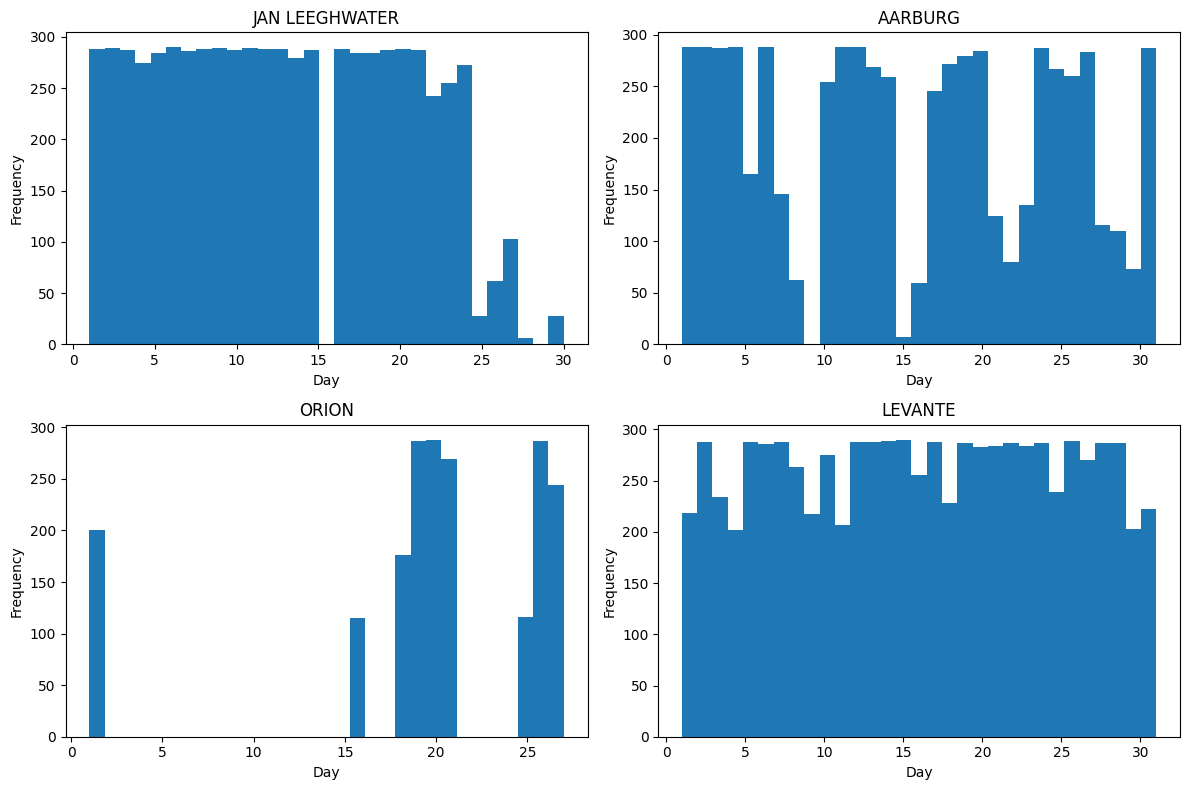

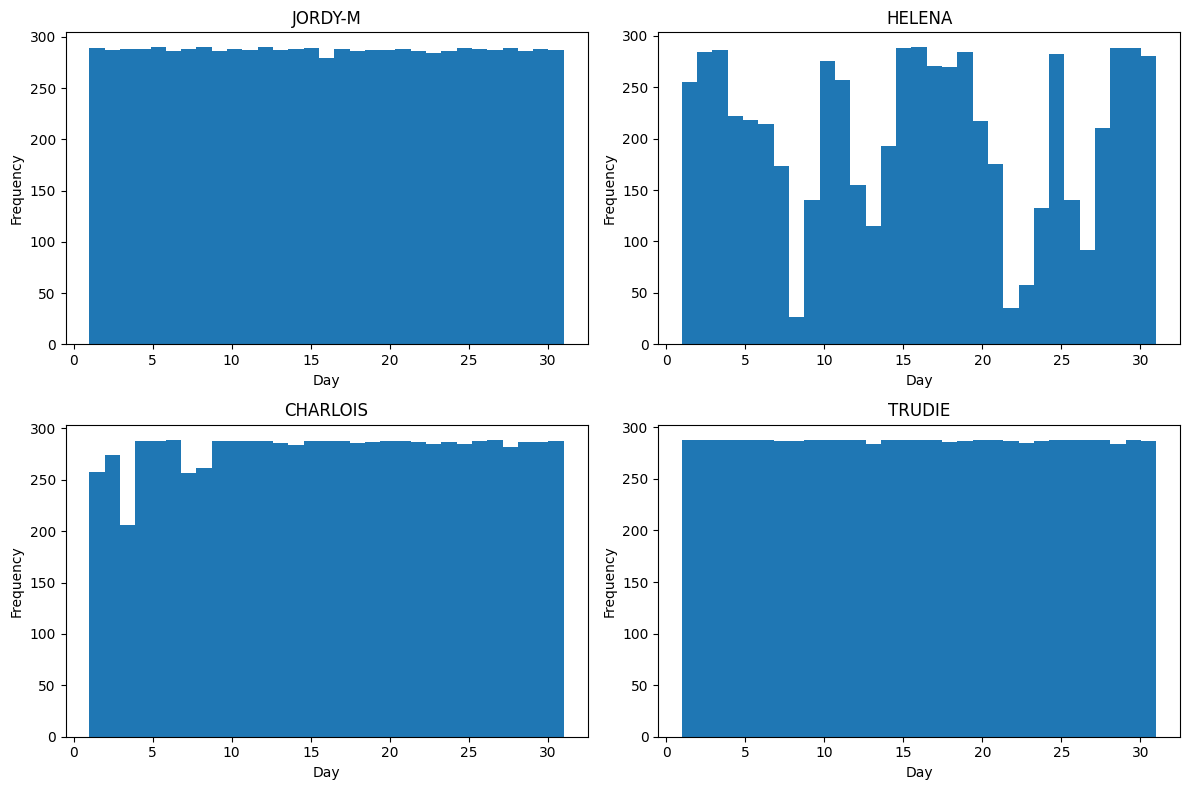

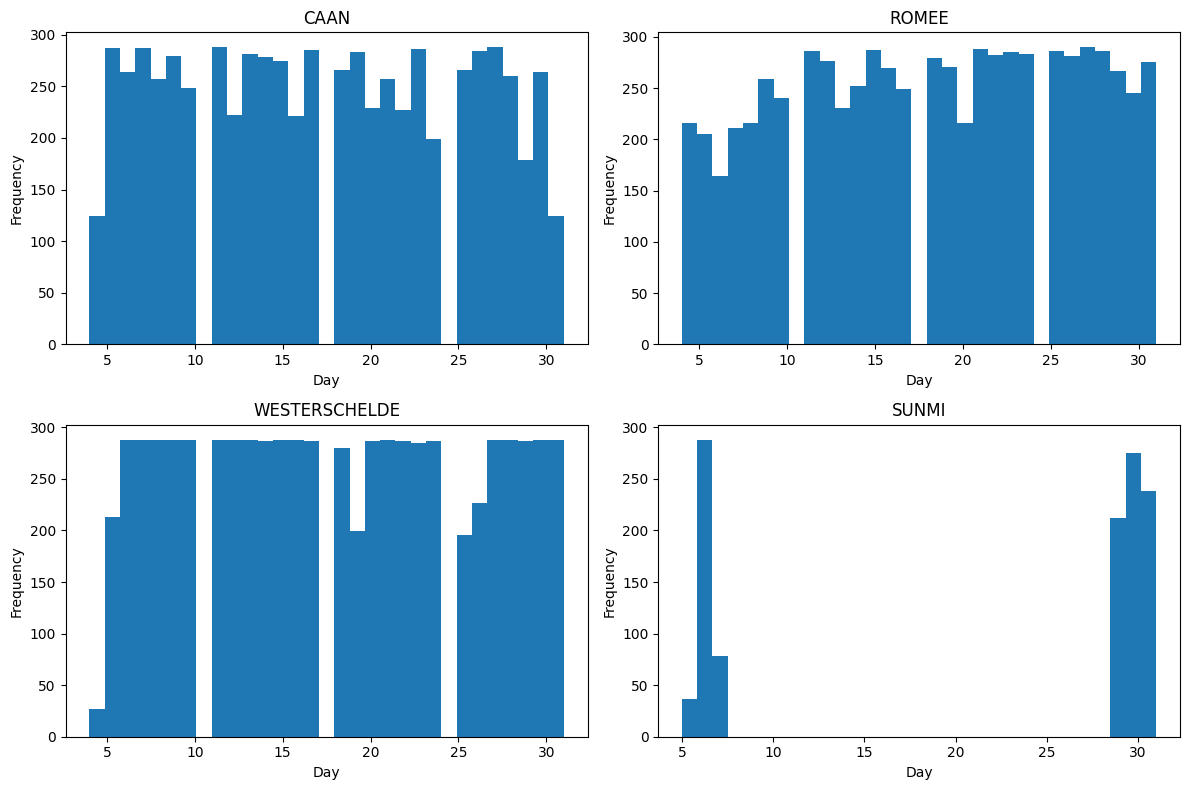

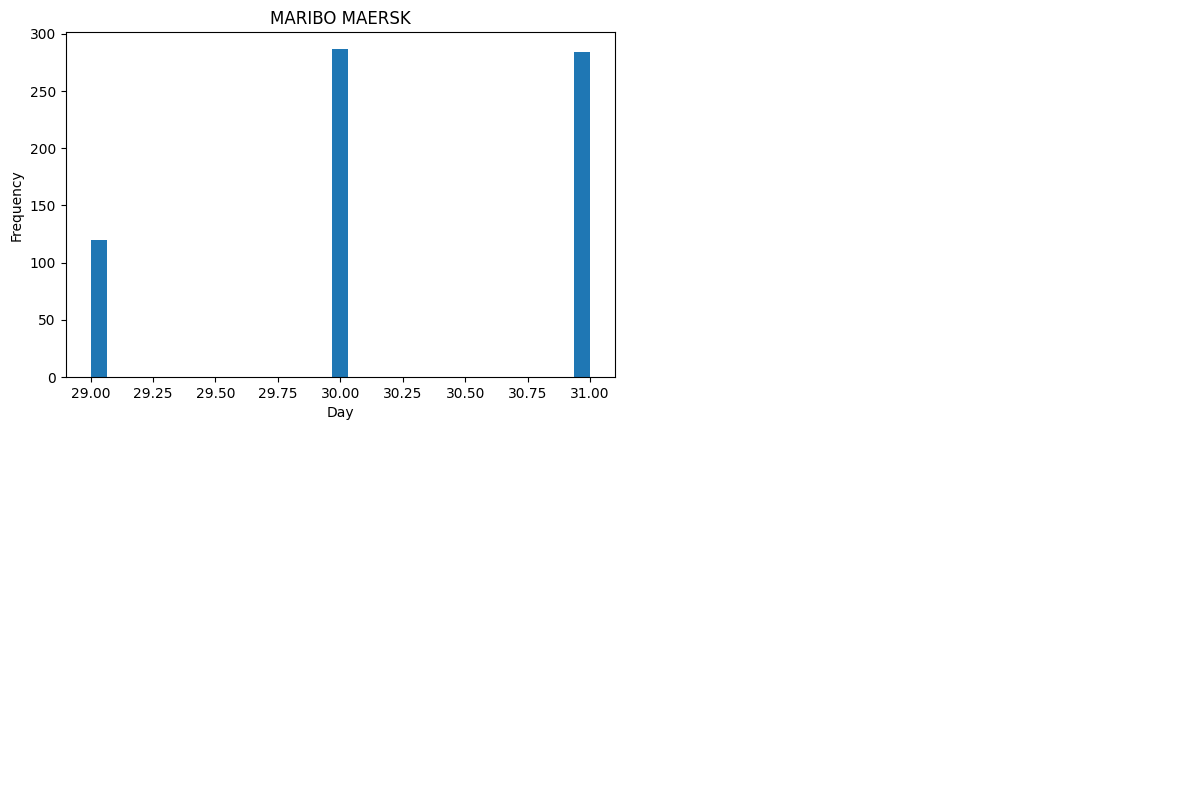

In [11]:
# Divide vessels into chunks of 4 and plot each chunk in a 2x2 grid
vessel_names = list(df_vessels.keys())
num_vessels = len(vessel_names)
vessels_per_plot = 4

for start in range(0, num_vessels, vessels_per_plot):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, key in enumerate(vessel_names[start:start + vessels_per_plot]):
        axes[i].hist(df_vessels[key]['day'], bins=31)
        axes[i].set_title(key)
        axes[i].set_xlabel('Day')
        axes[i].set_ylabel('Frequency')

    # Hide unused subplots
    for j in range(len(vessel_names[start:start + vessels_per_plot]), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


The histrograms show, that ORION, SUNMI and MARIBO MAERSK need to be further checked to see if the data is usable

In [14]:
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.basemap import Basemap

# Create a dropdown widget for selecting a day
unique_days = sorted(df_keep['day'].unique())
day_dropdown = widgets.Dropdown(
    options=[('All Days', None)] + [(f'Day {day}', day) for day in unique_days],
    value=None,
    description='Day:',
)

# Function to update the map based on the selected day
def update_map(day):
    fig, ax = plt.subplots(figsize=(12, 12))
    m = Basemap(projection='merc', llcrnrlat=51.5, urcrnrlat=52.5,
                llcrnrlon=3.5, urcrnrlon=5.5, resolution='i', ax=ax)

    # Draw coastlines, countries, and map boundaries
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='lightgray', lake_color='aqua')

    # Plot the datapoints for the selected vessels
    for key in ['ORION', 'SUNMI', 'MARIBO MAERSK']:
        vessel_data = df_vessels[key]
        if day is not None:
            vessel_data = vessel_data[vessel_data['day'] == day]
        x, y = m(vessel_data['navigation.location.long'].values,
                 vessel_data['navigation.location.lat'].values)
        ax.scatter(x, y, label=key)

    ax.legend()
    plt.show()

# Link the dropdown to the update_map function
interactive_plot = widgets.interactive(update_map, day=day_dropdown)

# Display the dropdown and the interactive plot
display(day_dropdown, interactive_plot)


Dropdown(description='Day:', options=(('All Days', None), ('Day 1', 1), ('Day 2', 2), ('Day 3', 3), ('Day 4', …

interactive(children=(Dropdown(description='Day:', options=(('All Days', None), ('Day 1', 1), ('Day 2', 2), ('…

The data points seem to be really inconsistent and will therefore be exlucded from the dataframe first. Maybe a run with these datapoints included could be made. But for now the "smoother" vessels will only be included

In [15]:
# drop 'ORION', 'SUNMI', 'MARIBO MAERSK' from the dictionary
df_vessels.pop('ORION')
df_vessels.pop('SUNMI')
df_vessels.pop('MARIBO MAERSK')

# show the keys of the dictionary with their size
for key in df_vessels.keys():
    print(key, df_vessels[key].shape)

JAN LEEGHWATER (7009, 13)
AARBURG (6339, 13)
LEVANTE (8202, 13)
JORDY-M (8906, 13)
HELENA (6414, 13)
CHARLOIS (8721, 13)
TRUDIE (8909, 13)
CAAN (7008, 13)
ROMEE (7198, 13)
WESTERSCHELDE (7469, 13)


Next step is to filter the data on locations. For example to exclude a vessel which is not moving at all